In [25]:
import torch
import matplotlib.pyplot as plt

In [2]:
def activation(x):
    return 1/(1+torch.exp(-x))

**Single Layer NN**

In [3]:
torch.manual_seed(7)
features = torch.randn((1,5))
weights = torch.rand_like(features)
bias = torch.randn((1,1))

In [9]:
activation(torch.sum(features*weights) + bias)

tensor([[0.6140]])

In [13]:
activation(torch.matmul(features, weights.T) + bias)

tensor([[0.6140]])

**Multi-Layer NN**

In [14]:
torch.manual_seed(7)
features = torch.randn((1,3))
n_input = features.shape[1]
n_hidden = 2
n_output = 1
W1 = torch.randn((n_input, n_hidden))
W2 = torch.randn((n_hidden, n_output))
B1 = torch.randn(1, n_hidden)
B2 = torch.randn(1, n_output)

In [17]:
H = activation(torch.matmul(features, W1) + B1)
O = activation(torch.matmul(H, W2) + B2)
O

tensor([[0.3171]])

**Neural Networks with PyTorch**

In [22]:
from torchvision import datasets, transforms

#Transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5), (0.5))])
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [23]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


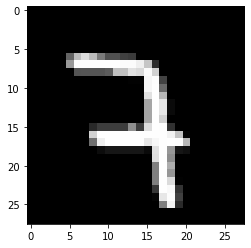

In [27]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [28]:
inputs = images.view(images.shape[0], -1)
w1 = torch.randn(784, 256)
b1 = torch.randn(256)
w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.matmul(inputs, w1) + b1)
out = torch.matmul(h, w2) + b2

In [34]:
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1,1)

In [37]:
probs = softmax(out)
print(probs.shape)
print(probs.sum(dim=1))
torch.argmax(probs, dim=1)

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


tensor([6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 8, 8, 6, 6, 6,
        6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 8, 6, 6, 6, 6, 8, 6, 8, 8, 6, 6, 8, 8, 6, 6])

**Building Neural Networks with torch NN**

In [38]:
from torch import nn

In [39]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(784, 256)
        self.out = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.out(x)
        x = self.softmax(x)
        return x

In [40]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [44]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim = 1))
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logits = model(images)
loss = criterion(logits, labels)
print(loss)

tensor(-0.1014, grad_fn=<NllLossBackward0>)


In [45]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 3.9832e-06,  3.9832e-06,  3.9832e-06,  ...,  3.9832e-06,
          3.9832e-06,  3.9832e-06],
        [-1.2686e-05, -1.2686e-05, -1.2686e-05,  ..., -1.2686e-05,
         -1.2686e-05, -1.2686e-05],
        [ 1.4070e-04,  1.4070e-04,  1.4070e-04,  ...,  1.4070e-04,
          1.4070e-04,  1.4070e-04],
        ...,
        [-2.8999e-05, -2.8999e-05, -2.8999e-05,  ..., -2.8999e-05,
         -2.8999e-05, -2.8999e-05],
        [ 2.2273e-04,  2.2273e-04,  2.2273e-04,  ...,  2.2273e-04,
          2.2273e-04,  2.2273e-04],
        [ 2.7212e-05,  2.7212e-05,  2.7212e-05,  ...,  2.7212e-05,
          2.7212e-05,  2.7212e-05]])


In [46]:
from torch import optim
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [51]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

#Clear the gradients
optimizer.zero_grad()

#Forward pass, backward pass, update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient - ', model[0].weight.grad)
#Take an update step and update new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Initial weights -  Parameter containing:
tensor([[ 0.0329, -0.0330, -0.0044,  ...,  0.0283,  0.0233,  0.0189],
        [-0.0154, -0.0285,  0.0200,  ...,  0.0288,  0.0107, -0.0057],
        [ 0.0180, -0.0033,  0.0139,  ...,  0.0352, -0.0264,  0.0194],
        ...,
        [-0.0195, -0.0111, -0.0263,  ...,  0.0228,  0.0169,  0.0161],
        [ 0.0264,  0.0025, -0.0225,  ...,  0.0188,  0.0070, -0.0144],
        [ 0.0193,  0.0309,  0.0026,  ...,  0.0080,  0.0260, -0.0191]],
       requires_grad=True)
Gradient -  tensor([[-9.0057e-08, -9.0057e-08, -9.0057e-08,  ..., -9.0057e-08,
         -9.0057e-08, -9.0057e-08],
        [ 2.9394e-04,  2.9394e-04,  2.9394e-04,  ...,  2.9394e-04,
          2.9394e-04,  2.9394e-04],
        [-2.7239e-04, -2.7239e-04, -2.7239e-04,  ..., -2.7239e-04,
         -2.7239e-04, -2.7239e-04],
        ...,
        [ 5.4765e-06,  5.4765e-06,  5.4765e-06,  ...,  5.4765e-06,
          5.4765e-06,  5.4765e-06],
        [ 3.3749e-04,  3.3749e-04,  3.3749e-04,  ...,  3.3749

**Complete Training**

In [55]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.resize_(images.shape[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f'Training Loss:{running_loss/len(trainloader)}')

Training Loss:1.0281863936356135
Training Loss:0.3872841634888893
Training Loss:0.32758905771158653
Training Loss:0.29664912068449867
Training Loss:0.2705866731226698


In [60]:
import numpy as np
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

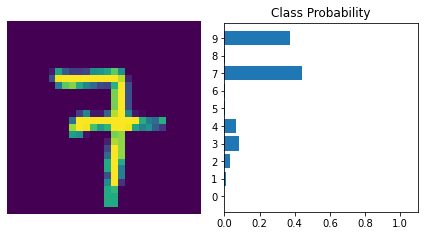

In [62]:
import torch.nn.functional as F
images, labels = next(iter(trainloader))
img = images[0].resize(1, 784)
with torch.no_grad():
    logits = model.forward(img)
ps = F.softmax(logits, dim=1)
view_classify(img.view(1,28,28), ps)